In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [9]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

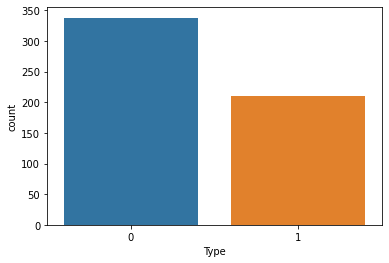

In [10]:
sbn.countplot(x="Type",data=dataFrame)

<AxesSubplot:>

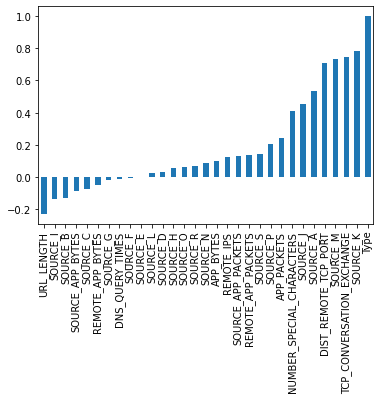

In [11]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [12]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis = 1).values


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=10)

In [16]:
from sklearn.preprocessing import MinMaxScaler


In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(x_train)

MinMaxScaler()

In [19]:
x_train = scaler.transform(x_train)

In [20]:
x_test = scaler.transform(x_test)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [25]:
model.fit(x=x_train,y = y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 29ms/step - loss: 0.6896 - val_loss: 0.6828
Epoch 2/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6799 - val_loss: 0.6731
Epoch 3/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6692 - val_loss: 0.6595
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6541 - val_loss: 0.6418
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6359 - val_loss: 0.6174
Epoch 6/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6106 - val_loss: 0.5858
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5788 - val_loss: 0.5445
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5371 - val_loss: 0.4950
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4890 - val_loss: 0.4408
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4360 - val_loss: 0.3840
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.1045
Epoch 84/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.1074
Epoch 85/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0553 - val_loss: 0.1022
Epoch 86/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0561 - val_loss: 0.1066
Epoch 87/700
12/12 [==============================] - 0s 21ms/step - loss: 0.0522 - val_loss: 0.1037
Epoch 88/700
12/12 [==============================] - 0s 11ms/step - loss: 0.0550 - val_loss: 0.1042
Epoch 89/700
12/12 [==============================] - 0s 13ms/step - loss: 0.0581 - val_loss: 0.1239
Epoch 90/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.1021
Epoch 91/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0536 - val_loss: 0.1047
Epoch 92/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0500 - val_loss: 0.10

12/12 [==============================] - 0s 7ms/step - loss: 0.0247 - val_loss: 0.1715
Epoch 165/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0244 - val_loss: 0.1737
Epoch 166/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.1699
Epoch 167/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0221 - val_loss: 0.1741
Epoch 168/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0241 - val_loss: 0.1755
Epoch 169/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0246 - val_loss: 0.1729
Epoch 170/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.1767
Epoch 171/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.1807
Epoch 172/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0268 - val_loss: 0.1796
Epoch 173/700
12/12 [==============================] - 0s 15ms/step - loss: 0.0225 - val_loss: 0.1877
Epo

12/12 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.2637
Epoch 246/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.2638
Epoch 247/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.2677
Epoch 248/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.2663
Epoch 249/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.2738
Epoch 250/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.2671
Epoch 251/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0138 - val_loss: 0.2734
Epoch 252/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.2959
Epoch 253/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.2900
Epoch 254/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.3020
Epoc

12/12 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.3327
Epoch 327/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.3384
Epoch 328/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0138 - val_loss: 0.3415
Epoch 329/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.3471
Epoch 330/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.3430
Epoch 331/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.3418
Epoch 332/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.3352
Epoch 333/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.3456
Epoch 334/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.3272
Epoch 335/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.3354
Epoc

Epoch 407/700
12/12 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss: 0.3772
Epoch 408/700
12/12 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.3850
Epoch 409/700
12/12 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.3803
Epoch 410/700
12/12 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.3798
Epoch 411/700
12/12 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.3791
Epoch 412/700
12/12 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.3816
Epoch 413/700
12/12 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.3839
Epoch 414/700
12/12 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.3796
Epoch 415/700
12/12 [==============================] - 0s 27ms/step - loss: 0.0039 - val_loss: 0.3839
Epoch 416/700
12/12 [==============================] - 0s 20ms/step - loss: 0.0040

Epoch 488/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.4270
Epoch 489/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.4252
Epoch 490/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.4297
Epoch 491/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.4285
Epoch 492/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.4366
Epoch 493/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.4329
Epoch 494/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.4417
Epoch 495/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.4271
Epoch 496/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.4361
Epoch 497/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - val_los

12/12 [==============================] - 0s 10ms/step - loss: 7.2040e-04 - val_loss: 0.4756
Epoch 568/700
12/12 [==============================] - 0s 12ms/step - loss: 6.3443e-04 - val_loss: 0.4750
Epoch 569/700
12/12 [==============================] - 0s 10ms/step - loss: 6.5198e-04 - val_loss: 0.4754
Epoch 570/700
12/12 [==============================] - 0s 14ms/step - loss: 6.4950e-04 - val_loss: 0.4747
Epoch 571/700
12/12 [==============================] - 0s 14ms/step - loss: 6.5291e-04 - val_loss: 0.4744
Epoch 572/700
12/12 [==============================] - 0s 10ms/step - loss: 6.3336e-04 - val_loss: 0.4767
Epoch 573/700
12/12 [==============================] - 0s 22ms/step - loss: 6.3070e-04 - val_loss: 0.4759
Epoch 574/700
12/12 [==============================] - 0s 8ms/step - loss: 8.1010e-04 - val_loss: 0.4792
Epoch 575/700
12/12 [==============================] - 0s 11ms/step - loss: 5.6670e-04 - val_loss: 0.4794
Epoch 576/700
12/12 [==============================] - 0s 16m

12/12 [==============================] - 0s 7ms/step - loss: 5.1975e-04 - val_loss: 0.5269
Epoch 646/700
12/12 [==============================] - 0s 7ms/step - loss: 3.5252e-04 - val_loss: 0.5191
Epoch 647/700
12/12 [==============================] - 0s 7ms/step - loss: 3.2808e-04 - val_loss: 0.5153
Epoch 648/700
12/12 [==============================] - 0s 9ms/step - loss: 3.1362e-04 - val_loss: 0.5144
Epoch 649/700
12/12 [==============================] - 0s 9ms/step - loss: 3.2715e-04 - val_loss: 0.5147
Epoch 650/700
12/12 [==============================] - 0s 8ms/step - loss: 3.3531e-04 - val_loss: 0.5172
Epoch 651/700
12/12 [==============================] - 0s 8ms/step - loss: 3.5511e-04 - val_loss: 0.5175
Epoch 652/700
12/12 [==============================] - 0s 8ms/step - loss: 3.0870e-04 - val_loss: 0.5205
Epoch 653/700
12/12 [==============================] - 0s 7ms/step - loss: 3.6322e-04 - val_loss: 0.5183
Epoch 654/700
12/12 [==============================] - 0s 9ms/step - 

In [26]:
modelkaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

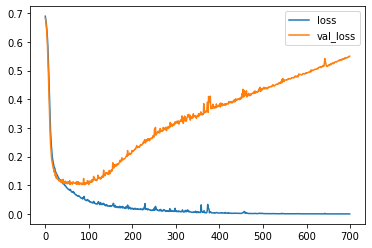

In [28]:
modelkaybi.plot()

In [29]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [30]:
earlystopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [31]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/700
12/12 [==============================] - 2s 33ms/step - loss: 0.6892 - val_loss: 0.6797
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6742 - val_loss: 0.6647
Epoch 3/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6589 - val_loss: 0.6466
Epoch 4/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6399 - val_loss: 0.6226
Epoch 5/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6136 - val_loss: 0.5893
Epoch 6/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5792 - val_loss: 0.5478
Epoch 7/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5379 - val_loss: 0.4978
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4891 - val_loss: 0.4421
Epoch 9/700
12/12 [==============================] - 0s 9ms/step - loss: 0.4363 - val_loss: 0.3842
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3847 - val_loss: 0.3322
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0930 - val_loss: 0.1063
Epoch 84/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0872 - val_loss: 0.1069
Epoch 85/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0842 - val_loss: 0.1030
Epoch 86/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0839 - val_loss: 0.1088
Epoch 87/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0848 - val_loss: 0.1066
Epoch 88/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0842 - val_loss: 0.1141
Epoch 89/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0868 - val_loss: 0.1190
Epoch 90/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0802 - val_loss: 0.1109
Epoch 91/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0784 - val_loss: 0.1092
Epoch 92/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0787 - val_loss: 0.1072


In [32]:
modelkaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

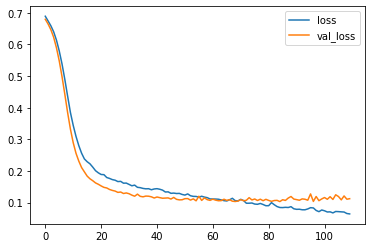

In [33]:
modelkaybi.plot()

In [34]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [35]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/700
12/12 [==============================] - 2s 72ms/step - loss: 0.7150 - val_loss: 0.6930
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6947 - val_loss: 0.6902
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6915 - val_loss: 0.6884
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6875 - val_loss: 0.6865
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6888 - val_loss: 0.6847
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6855 - val_loss: 0.6827
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6802 - val_loss: 0.6809
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6686 - val_loss: 0.6787
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6774 - val_loss: 0.6764
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6674 - val_loss: 0.6733
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 8ms/step - loss: 0.2370 - val_loss: 0.1130
Epoch 84/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2165 - val_loss: 0.1168
Epoch 85/700
12/12 [==============================] - 0s 9ms/step - loss: 0.2380 - val_loss: 0.1132
Epoch 86/700
12/12 [==============================] - 0s 9ms/step - loss: 0.2247 - val_loss: 0.1191
Epoch 87/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2111 - val_loss: 0.1203
Epoch 88/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2128 - val_loss: 0.1113
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1998 - val_loss: 0.1102
Epoch 90/700
12/12 [==============================] - 0s 11ms/step - loss: 0.2384 - val_loss: 0.1136
Epoch 91/700
12/12 [==============================] - 0s 12ms/step - loss: 0.2278 - val_loss: 0.1098
Epoch 92/700
12/12 [==============================] - 0s 12ms/step - loss: 0.2215 - val_loss: 0.10

Epoch 164/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1496 - val_loss: 0.0895
Epoch 165/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1528 - val_loss: 0.0879
Epoch 166/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1666 - val_loss: 0.1097
Epoch 167/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1659 - val_loss: 0.0898
Epoch 168/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1492 - val_loss: 0.0813
Epoch 169/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1434 - val_loss: 0.0991
Epoch 170/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1236 - val_loss: 0.0820
Epoch 171/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1480 - val_loss: 0.0761
Epoch 172/700
12/12 [==============================] - 0s 7ms/step - loss: 0.1317 - val_loss: 0.0904
Epoch 173/700
12/12 [==============================] - 0s 6ms/step - loss: 0.1380 - val_los

In [36]:
kayipDF = pd.DataFrame(model.history.history)

<AxesSubplot:>

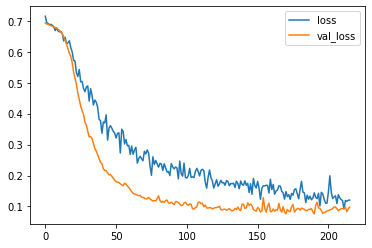

In [37]:
kayipDF.plot()

In [42]:
tahminler = model.predict(x_test)

In [45]:
classes_x=np.argmax(tahminler,axis=1)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       102
           1       0.00      0.00      0.00        63

    accuracy                           0.62       165
   macro avg       0.31      0.50      0.38       165
weighted avg       0.38      0.62      0.47       165



C:\Users\Emrah\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emrah\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emrah\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
c